In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


house_df.head(10)


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [2]:
#first look at distribution

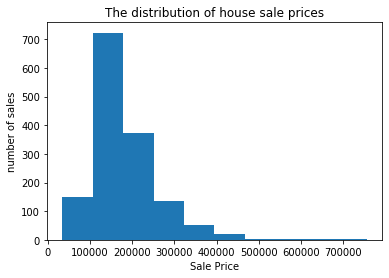

In [3]:
plt.hist(house_df.saleprice)
plt.title("The distribution of house sale prices")
plt.xlabel("Sale Price")
plt.ylabel("number of sales")
plt.show()

In [4]:
#highly skewed right, majority of housing prices are low

In [5]:
house_df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paved

In [6]:
for column_name in house_df.columns:
    print("Unique values in column {} are: {}".format(column_name, house_df[column_name].unique()))

Unique values in column id are: [   1    2    3 ... 1458 1459 1460]
Unique values in column mssubclass are: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column mszoning are: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column lotfrontage are: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values in column lotarea are: [ 8450  9600 11250 ... 17217 13175  9717]
Unique values in column street are: ['Pave' 'Grvl']
Unique values in column 

In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [8]:
house_df.nunique()
##small numbers can indicate categorical 

id               1460
mssubclass         15
mszoning            5
lotfrontage       110
lotarea          1073
street              2
alley               2
lotshape            4
landcontour         4
utilities           2
lotconfig           5
landslope           3
neighborhood       25
condition1          9
condition2          8
bldgtype            5
housestyle          8
overallqual        10
overallcond         9
yearbuilt         112
yearremodadd       61
roofstyle           6
roofmatl            8
exterior1st        15
exterior2nd        16
masvnrtype          4
masvnrarea        327
exterqual           4
extercond           5
foundation          6
                 ... 
bedroomabvgr        8
kitchenabvgr        4
kitchenqual         4
totrmsabvgrd       12
functional          7
fireplaces          4
fireplacequ         5
garagetype          6
garageyrblt        97
garagefinish        3
garagecars          5
garagearea        441
garagequal          5
garagecond          5
paveddrive

In [9]:
house_df.isnull().sum()*100/house_df.isnull().count()

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage      17.739726
lotarea           0.000000
street            0.000000
alley            93.767123
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.547945
masvnrarea        0.547945
exterqual         0.000000
extercond         0.000000
foundation        0.000000
                   ...    
bedroomabvgr      0.000000
kitchenabvgr      0.000000
kitchenqual       0.000000
totrmsabvgrd      0.000000
functional        0.000000
fireplaces        0.000000
f

In [35]:
total_missing = house_df.isnull().sum().sort_values(ascending=False)
percent_missing = (house_df.isnull().sum()/house_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
garagecond,81,0.055479
garagequal,81,0.055479
garagefinish,81,0.055479
garageyrblt,81,0.055479
garagetype,81,0.055479


In [10]:
#Given the information above, I will be disregarding the 19 variables because of it's high percentage 
#missing values. There are many similar variables that the missing data will have very little impact on the 
#model

In [39]:
house_df.drop(['alley', 'fireplacequ', 'poolqc', 'fence', 'miscfeature', 'garagecond', 'garagequal', 'garageyrblt', 'garagetype', 'bsmtfintype2', 'bsmtexposure', 'bsmtfintype1', 'bsmtqual', 'bsmtcond','masvnrtype', 'masvnrarea', 'electrical'],  axis=1)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,...,CarPort,Detchd,Fin,RFn,Unf,Ex,Fa,Gd,Po,TA
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,0,1
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,1,0,0,0,0,0,1
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,0,1
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,1,0,0,1,0,0,0,0,1
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,1,0,0,0,0,0,1
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,1,0,0,0,0,1
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,0,1
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,1,0,0,0,0,0,1
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,...,0,1,0,0,1,0,0,0,0,1
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,1,0,0,0,0,0,1


In [40]:
non_numeric_columns = house_df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
The number of non-numerical columns is 43


In [41]:
numeric_columns = house_df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
The number of numerical columns is 38


In [42]:
np.abs(house_df[numeric_columns].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.334901
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

In [ ]:
#find relationship between target variable and non-numeric variables - sales against variable

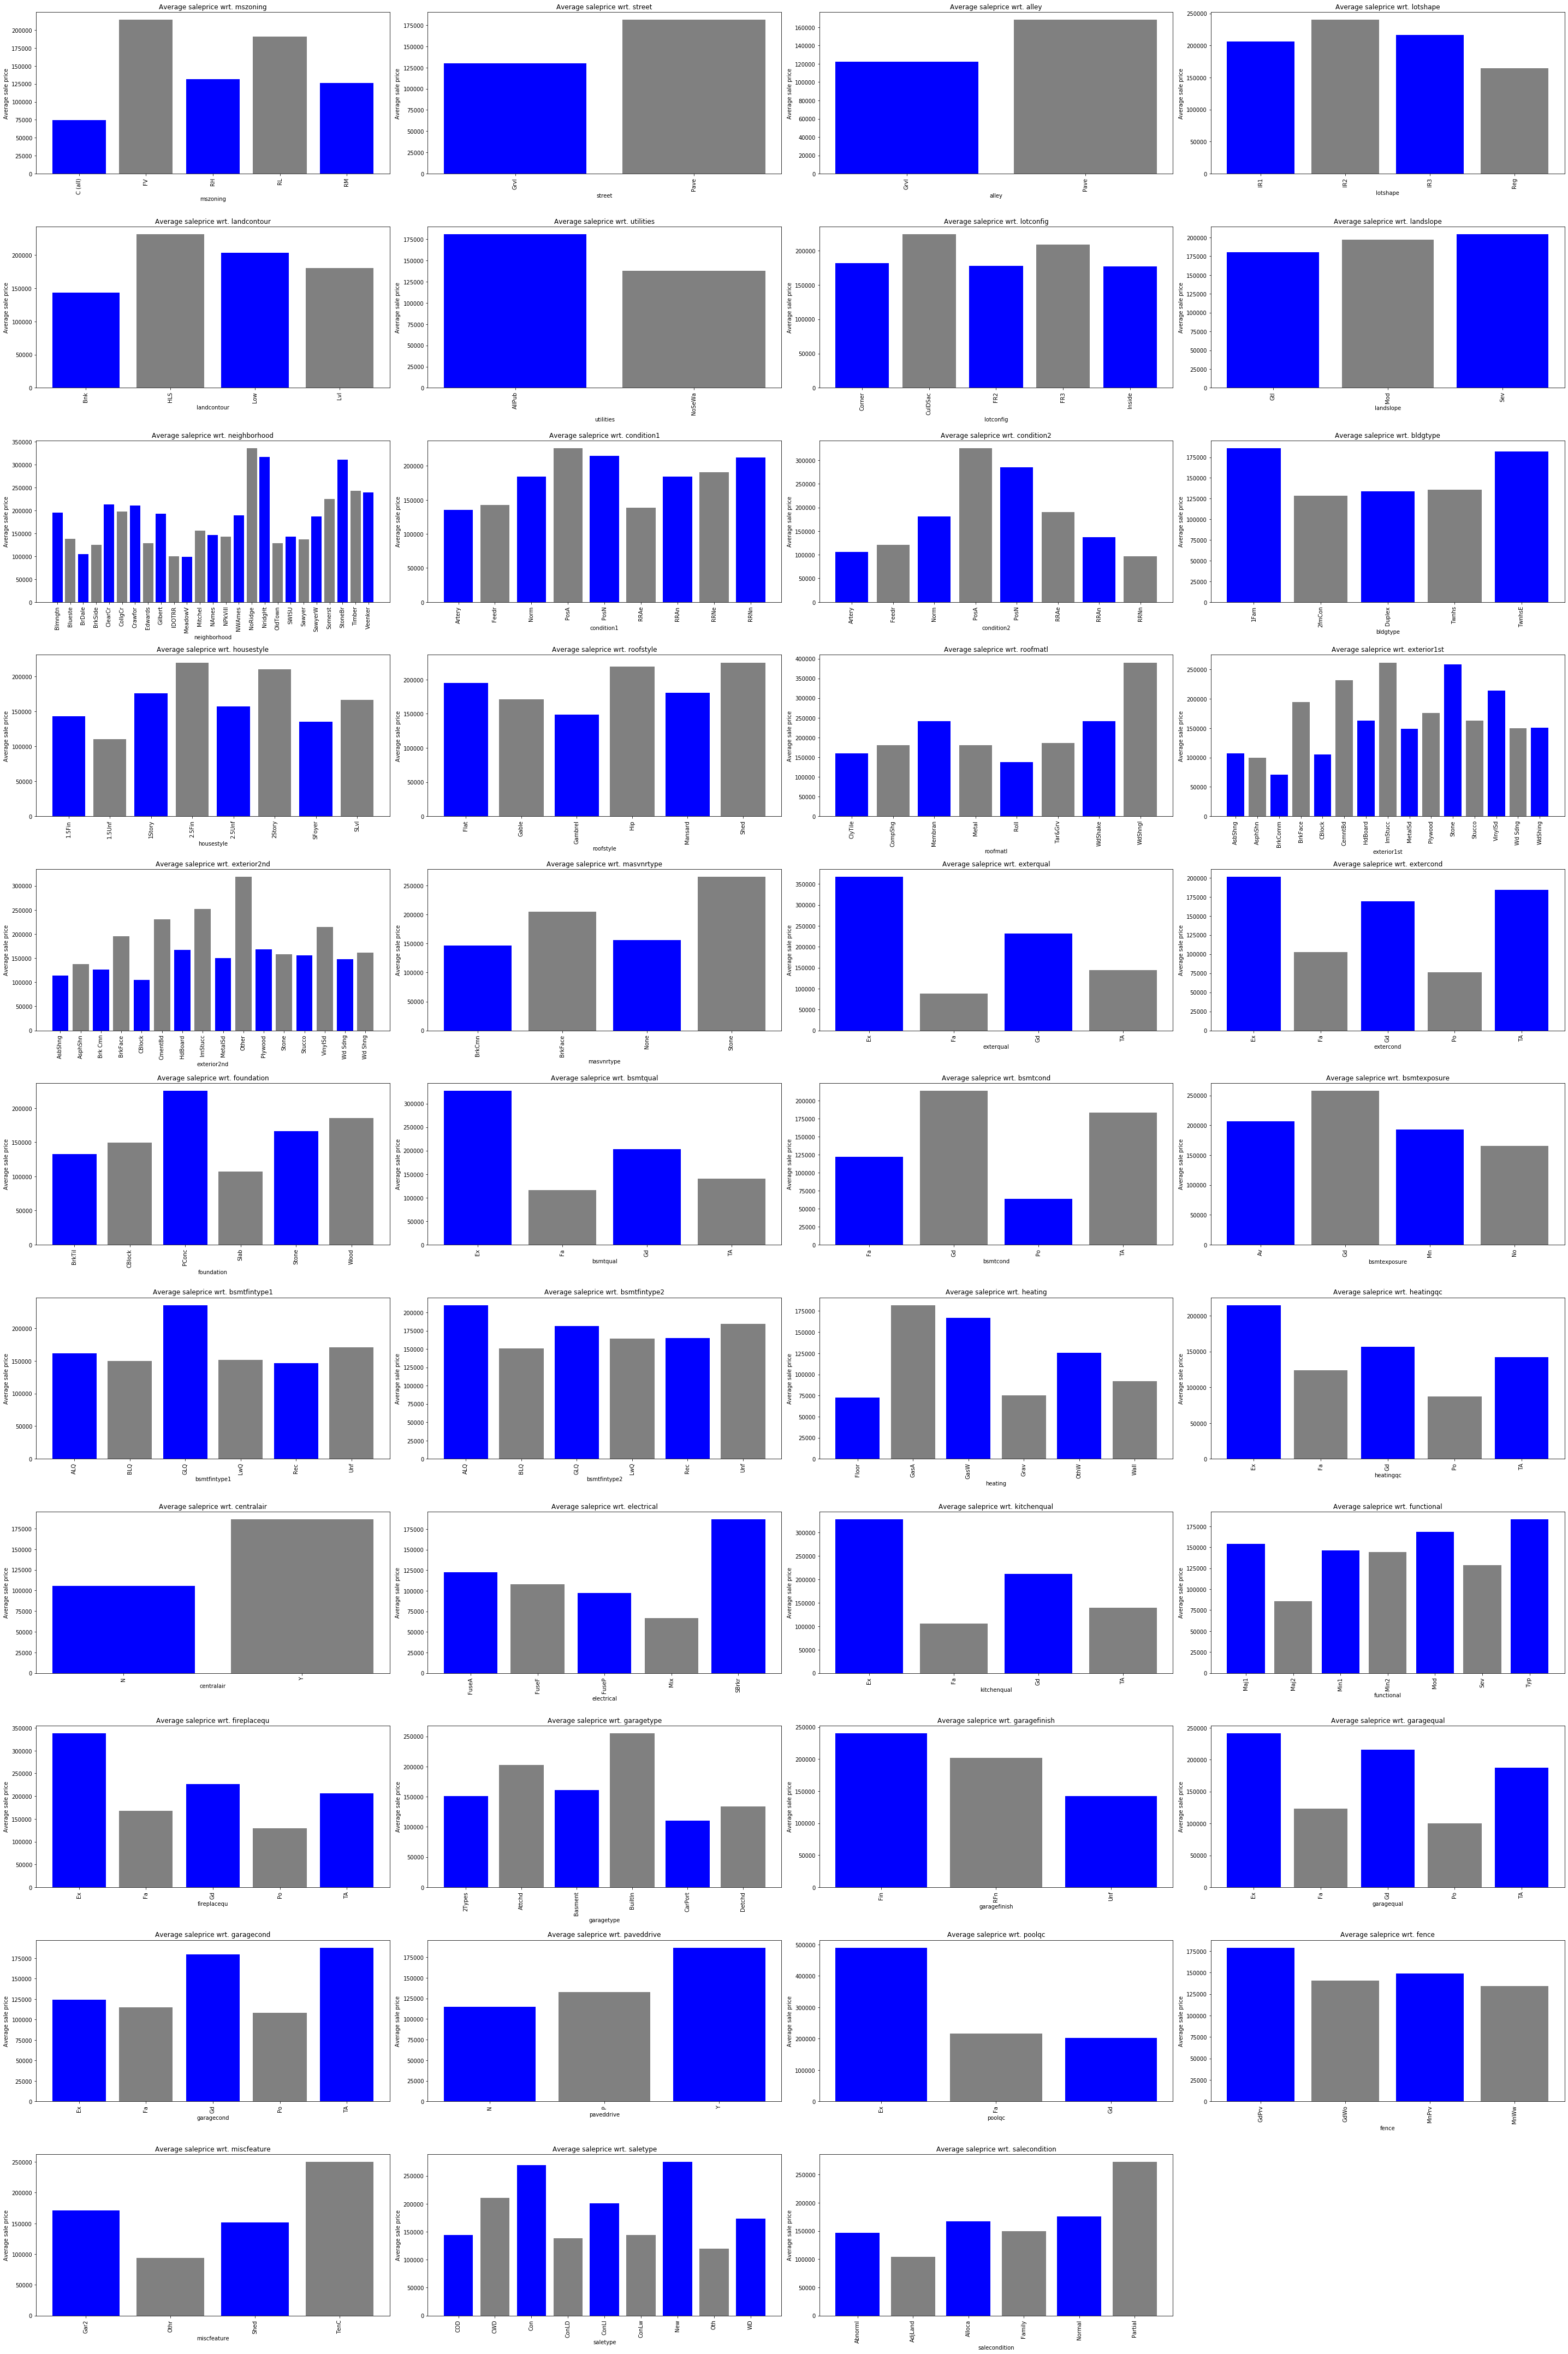

In [50]:
plt.figure(figsize=(40,60))
for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4,index+1)
    plt.bar(house_df.groupby(column)["saleprice"].mean().index, house_df.groupby(column)["saleprice"].mean(),
           color=("blue","grey"))
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
#from the corr table, I choose the following numeric variables
#overallqual      0.790982
#grlivarea        0.708624
#garagecars       0.640409
#garagearea       0.623431
#totalbsmtsf      0.613581
#firstflrsf       0.605852
#fullbath         0.560664
#totrmsabvgrd     0.533723
#yearbuilt        0.522897
#yearremodadd     0.507101


#non numeric numbers will include:
#mszoning and housestyle

In [55]:
house_df = pd.concat([house_df,pd.get_dummies(house_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_df = pd.concat([house_df,pd.get_dummies(house_df.housestyle, prefix="housestyle", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_df.housestyle, prefix="housestyle", drop_first=True).columns)




In [ ]:
#reg model

In [56]:
X = house_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 'firstflrsf', 'fullbath', 'totrmsabvgrd',  'yearbuilt', 'yearremodadd'] + dummy_column_names]
Y = house_df.saleprice



In [58]:
import statsmodels.api as sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     247.4
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:40:59   Log-Likelihood:                -17428.
No. Observations:                1460   AIC:                         3.490e+04
Df Residuals:                    1438   BIC:                         3.502e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.066e+06   1.37e+05     -7.799      0.000   -1.33e+06   -7.98e+05
overallqual        2.074e+04   1199.897     17.281      0.000    1.84e+04    2.31e+04
grlivarea            81.3131      6.659     12.211      0.000      68.251      94.375
garagecars         1.071e+04   3020.995      3.544      0.000    4779.827    1.66e+04
garagearea           13.7736     10.258      1.343      0.180      -6.348      33.895
totalbsmtsf          20.6766      4.304      4.805      0.000      12.235      29.119
firstflrsf          -26.5873      8.249     -3.223      0.001     -42.768     -10.406
fullbath          -6781.8813   2663.911     -2.546      0.011    -1.2e+04   -1556.313
totrmsabvgrd        179.2368   1120.623      0.160      0.873   -2018.993    2377.467
yearbuilt           163.8416     56.315      2.909      0.004      53.374     274.310
yearremodadd        324.3732     63.221      5.131      0.000     200.358     448.388
mszoning_FV        4407.3035   4401.101      1.001      0.317   -4225.963     1.3e+04
mszoning_FV        4407.3035   4401.101      1.001      0.317   -4225.963     1.3e+04
mszoning_FV        4407.3035   4401.101      1.001      0.317   -4225.963     1.3e+04
mszoning_RH        1771.3248   5091.769      0.348      0.728   -8216.767    1.18e+04
mszoning_RH        1771.3248   5091.769      0.348      0.728   -8216.767    1.18e+04
mszoning_RH        1771.3248   5091.769      0.348      0.728   -8216.767    1.18e+04
mszoning_RL        5738.7036   4050.651      1.417      0.157   -2207.115    1.37e+04
mszoning_RL        5738.7036   4050.651      1.417      0.157   -2207.115    1.37e+04
mszoning_RL        5738.7036   4050.651      1.417      0.157   -2207.115    1.37e+04
mszoning_RM        1416.6387   4078.163      0.347      0.728   -6583.148    9416.426
mszoning_RM        1416.6387   4078.163      0.347      0.728   -6583.148    9416.426
mszoning_RM        1416.6387   4078.163      0.347      0.728   -6583.148    9416.426
housestyle_1.5Unf  7548.6217   3657.301      2.064      0.039     374.405    1.47e+04
housestyle_1.5Unf  7548.6217   3657.301      2.064      0.039     374.405    1.47e+04
housestyle_1.5Unf  7548.6217   3657.301      2.064      0.039     374.405    1.47e+04
housestyle_1Story  7342.6678   1715.882      4.279      0.000    3976.768    1.07e+04
housestyle_1Story  7342.6678   1715.882      4.279      0.000    3976.768    1.07e+04
housestyle_1Story  7342.6678   1715.882      4.279      0.000    3976.768    1.07e+04
housestyle_2.5Fin -1.361e+04   4916.048     -2.768      0.006   -2.32e+04   -3962.108
housestyle_2.5Fin -1.361e+04   4916.048     -2.768      0.006   -2.32e+04   -3962.108
housestyle_2.5Fin -1.361e+04   4916.048     -2.768      0.006   -2.32e+04   -3962.108
housestyle_2.5Unf -9931.5706   4013.556     -2.475      0.013   -1.78e+04